In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

# Ignore Warnings 
import warnings         
warnings.filterwarnings("ignore")

In [2]:
# Set the style of seaborn
sns.set(style="whitegrid") 

### EDA: Understanding the Dataset 

Shape, missing values, data types, overview etc

In [3]:
# loading the dataset 
loan_data_df = pd.read_csv("../data/loan_default_dataset_kenya.csv")

In [4]:
# Overview of the dataset 
loan_data_df.head()

,Customer_ID,Age,Gender,Marital_Status,Employment_Status,Education_Level,Number_of_Dependents,Region,Account_Tenure_Years,Annual_Income,Loan_Amount,Loan_Term,Loan_Purpose,Credit_Score,Previous_Defaults,Existing_Loan_Count,Debt_to_Income_Ratio,Monthly_Installment,Late_Payments_Count,Default_Status
0,C001,58,Female,Single,Employed,Diploma,3,Nairobi,17,2910864,1803901,48,Business,643,0,1,0.62,37581.27,0,0
1,C002,48,Male,Widowed,Unemployed,Secondary,2,Nairobi,10,4543699,1419930,24,Medical,594,0,2,0.31,59163.75,1,1
2,C003,34,Male,Single,Unemployed,Secondary,0,Eldoret,20,3910879,1711066,48,Business,818,0,0,0.44,35647.21,1,0
3,C004,62,Female,Divorced,Unemployed,Masters,1,Nairobi,11,3335609,1372954,36,Medical,834,1,1,0.41,38137.61,0,0
4,C005,27,Male,Single,Self-Employed,PhD,3,Nairobi,4,1135783,758970,36,Education,526,0,1,0.67,21082.50,0,1


In [5]:
# Cehcking the data types of the columns
loan_data_df.dtypes

Customer_ID              object
Age                       int64
Gender                   object
Marital_Status           object
Employment_Status        object
Education_Level          object
Number_of_Dependents      int64
Region                   object
Account_Tenure_Years      int64
Annual_Income             int64
Loan_Amount               int64
Loan_Term                 int64
Loan_Purpose             object
Credit_Score              int64
Previous_Defaults         int64
Existing_Loan_Count       int64
Debt_to_Income_Ratio    float64
Monthly_Installment     float64
Late_Payments_Count       int64
Default_Status            int64
dtype: object

In [6]:
# Checking for missing values in the dataset
loan_data_df.isnull().sum()

Customer_ID             0
Age                     0
Gender                  0
Marital_Status          0
Employment_Status       0
Education_Level         0
Number_of_Dependents    0
Region                  0
Account_Tenure_Years    0
Annual_Income           0
Loan_Amount             0
Loan_Term               0
Loan_Purpose            0
Credit_Score            0
Previous_Defaults       0
Existing_Loan_Count     0
Debt_to_Income_Ratio    0
Monthly_Installment     0
Late_Payments_Count     0
Default_Status          0
dtype: int64

In [7]:
# Checking the shape of the dataset
loan_data_df.shape

(500, 20)

In [8]:
# Checking the columns of the dataset
loan_data_df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Marital_Status', 'Employment_Status',
       'Education_Level', 'Number_of_Dependents', 'Region',
       'Account_Tenure_Years', 'Annual_Income', 'Loan_Amount', 'Loan_Term',
       'Loan_Purpose', 'Credit_Score', 'Previous_Defaults',
       'Existing_Loan_Count', 'Debt_to_Income_Ratio', 'Monthly_Installment',
       'Late_Payments_Count', 'Default_Status'],
      dtype='object')

### Business Questions

1. Which customer segments have the highest default rates? - Segmentation by variables like employment status, education level, region, or age group.

2. How does the credit score impact the likelihood of loan default? - Is there a threshold below which default rates spike?

3. What is the relatinship between Debt-to-Income Ratio and loan default? - is there a critical DTI level that signals higher risks

4. Do existing loans or previous defaults significantly increase the risk of new defaults?

5. Which loan purposes are most commonly associated with loan defaults?

6. Can we build a predictinve mode to identify high-risk loan applicants before disbursements? - Using key variables like Credit Score, Income, and Loan Amount?

#### **1. Customers Segments - Education Level, Employment Status, Region, and Age Group**

In [9]:
# We want to segment the customers into;
# 1. Education Level
# 2. Employment Status  
# 3. Region
# 4. Age Group 

# Default rate by education level
default_rate_by_education_level = loan_data_df.groupby("Education_Level").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False)

default_rate_by_education_level.columns = ['Education Level', 'Default Rate']

default_rate_by_education_level["Default Rate"] = default_rate_by_education_level["Default Rate"] * 100

In [10]:
# Default rate by employment status 
default_rate_by_employment_status = loan_data_df.groupby("Employment_Status").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False)

default_rate_by_employment_status.columns = ['Employment Status', 'Default Rate']

default_rate_by_employment_status["Default Rate"] = default_rate_by_employment_status["Default Rate"] * 100

In [11]:
# Default rate by region 
default_rate_by_region = loan_data_df.groupby("Region").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False) 

default_rate_by_region.columns = ['Region', 'Default Rate']

default_rate_by_region["Default Rate"] = default_rate_by_region["Default Rate"] * 100

In [12]:
# Default rate by age group 
# - We first create age groups
age_bins = [18, 25, 35, 45, 55, 65, 100] 

age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'] 

loan_data_df["Age_Group"] = pd.cut(loan_data_df["Age"], bins=age_bins, labels=age_labels) 

default_rate_by_age_group = loan_data_df.groupby("Age_Group").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False) 

default_rate_by_age_group.columns = ['Age Group', 'Default Rate']

default_rate_by_age_group["Default Rate"] = default_rate_by_age_group["Default Rate"] * 100

In [13]:
# Default rate by income levels 
# - We first create income bands
income_bands = [100000, 400000, 800000, 1200000, 1600000, 2000000, 2400000, 2800000, 3200000, 3600000, 4000000, 4400000, 4800000, 5200000]

income_band_labels = ['0-400k', '400k-800k', '800k-1.2M', '1.2M-1.6M', '1.6M-2M', '2M-2.4M', '2.4M-2.8M', '2.8M-3.2M', '3.2M-3.6M', '3.6M-4M', '4M-4.4M', '4.4M-4.8M', '4.8M-5.2M'] 

loan_data_df["Income_Band"] = pd.cut(loan_data_df["Annual_Income"], bins=income_bands, labels=income_band_labels) 

loan_default_by_income_band = loan_data_df.groupby("Income_Band").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False)

loan_default_by_income_band.columns = ['Income Band', 'Default Rate']

loan_default_by_income_band["Default Rate"] = loan_default_by_income_band["Default Rate"] * 100 

In [14]:
# Default rate by gender 

default_rate_by_gender = loan_data_df.groupby("Gender").Default_Status.mean().reset_index().sort_values(by="Default_Status", ascending=False) 

default_rate_by_gender.columns = ["Gender", "Default Rate"] 

default_rate_by_gender["Default Rate"] = default_rate_by_gender["Default Rate"] * 100

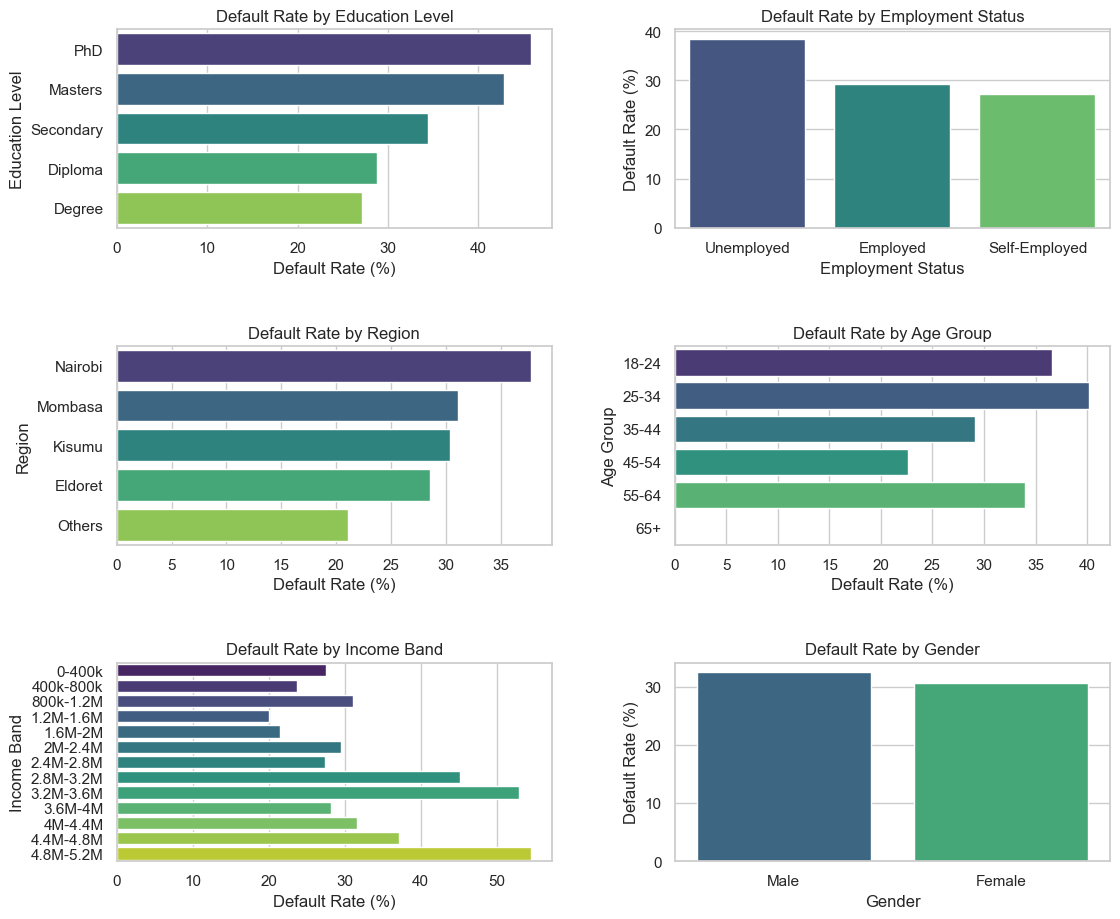

In [15]:
# Visualizing default rates by different segments

fig, ax = plt.subplots(3, 2, figsize=(12, 10))

# Default rate by education level
sns.barplot(default_rate_by_education_level, x="Default Rate", y="Education Level", palette="viridis", ax=ax[0,0])

ax[0,0].set_title("Default Rate by Education Level")  

ax[0,0].set_xlabel("Default Rate (%)") 


# Default rate by employment status
sns.barplot(default_rate_by_employment_status, x="Employment Status", y="Default Rate", palette="viridis", ax=ax[0,1])

ax[0,1].set_title("Default Rate by Employment Status")   

ax[0,1].set_ylabel("Default Rate (%)") 


# Default rate by region 
sns.barplot(default_rate_by_region, x="Default Rate", y="Region", palette="viridis", ax=ax[1,0])

ax[1,0].set_title("Default Rate by Region")

ax[1,0].set_xlabel("Default Rate (%)")


# Default rate by age group 
sns.barplot(default_rate_by_age_group, x="Default Rate", y="Age Group", palette="viridis", ax=ax[1,1])

ax[1,1].set_title("Default Rate by Age Group") 

ax[1,1].set_xlabel("Default Rate (%)")



# Default rate by income band 
sns.barplot(loan_default_by_income_band, x="Default Rate", y="Income Band", palette="viridis", ax=ax[2,0])

ax[2,0].set_title("Default Rate by Income Band")   

ax[2,0].set_xlabel("Default Rate (%)")



# Default rate by gender 
sns.barplot(default_rate_by_gender, x="Gender", y="Default Rate", palette="viridis", ax=ax[2,1])
ax[2,1].set_title("Default Rate by Gender") 
ax[2,1].set_ylabel("Default Rate (%)")

plt.tight_layout(pad=3.0) # Increasing padding space for the subplots


### Data Story | Key Findings

##### **Education Level**
- PhD's and masters holders have the highest default rate (approaching 40%)

- This insight is counterintuitive. It suggest that education level is not a major factor to protect against loan default or to be considered during risk assessment. This phenomenon may be explained as follows;
  1. **Over-Leveraging** - This occurrs when Ph.D's and Masters holders (or individuals with higher levels of education) take more debt than they can can reasonably pay. This may be caused by the fact that they have higher abilities hence qualify for larger loans, they expect high incomes because they have higher academic qualifications, and they may have other obligations such as education loans. Even though they are highly educated, they may have challenges making monthly loan repayments especially when the debt obligation is higher than the cashflow/income.

  2. **Mismatch Between Qualifications and Income Generation** - This means that, while someone may have a higher academic qualification, they may not be earning as much as expected. This me be as a result of;
        - **Underemployment**, that is, working a job that doesn't match skills or pay expectations. 
        - **Economic Constraints** which may result to delayed promotions or market saturation resulting to low demand.


##### **Employment Status**
- Unemployed borrowers have the highest default rate (approaching 40%). This rate is significantly higher compared to employed borrowers (approx 27%) and self-employed borrowers (approx 25%).

- This insight suggest that employment status is a major factor during risk assessment. For the loan products that target unemployed people, such offerings should be reconsidered or re-evaluated. 


##### **Region** 

- Borrowers from Nairobi Region have the highest default rate, followed closely by Mombasa with default rates approaching 40%. 

- This suggest that cities tend to have higher default rates. This may be as a result of high cost of living that may force people to borrow more (increase thier borrowing) compared to "Other" regions which may be considered to be outside cities. 

- It is important to consider Region during risk assessment and focus should be given to diversification of regions into "Other" regions to diversify the credit portfolion and reduce exposure. 


##### **Age Group**

- Young burrowers aged 18-34 years have higher default rates peaking at 39%. This may be attributed by the fact that this segment of borrowers is in thier early stages of thier career or entreprenuership journey. Therefore, they may lack stable and well-established financial management and planning skills. This segment comproses of university students, young profesisonals, or freelancers in the gig-economy. There income levels may be unreliable, sporadic, or low which may make it hard to meet montly installments in some cases. Therefore, they tend to be more financially vulnerable which may call for interventions like financial education, tight credit scoring, and strick financial verification.

- Older customers aged 45-54 years demonstrates lower default rates notably because they have more stable financial management and planning skills, they have established careers or business, or have conservative borrowing behavior. This segment already owns property like homes, land, and cars which may serve as collaterals for the loans reducing the percieved risk of default. As a result, their default rate is moderate-to-low. The bank should therefore focus on retaining this age group, cross-sell other products (e.g., mortgages, investment products), and up-sell higher ticket loans.

- Therefore, age is a critical factor during risk assessment. 


##### **Gender** 

- Both Male and Female borrowers tend to have a similar default rate. Whereas male borrowers depicts a slightly higher default rate, gender may not be a significant factor during risk assessment.


##### **Income**




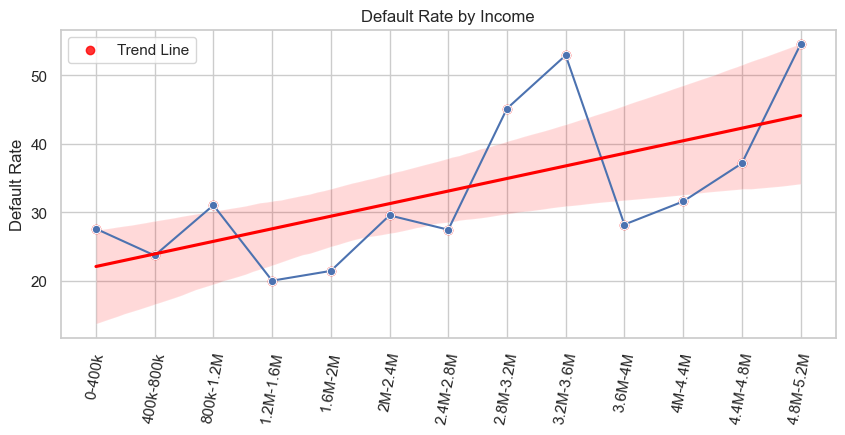

In [16]:
# A Further Demonstration of the default rate by income band using line plot further
plt.figure(figsize=(10, 4))
sns.set_theme(style="whitegrid")
sns.lineplot(loan_default_by_income_band, x="Income Band", y="Default Rate", marker="o")
plt.title("Default Rate by Income")

# Introducing a regression line to show the trend of default rate by income band
sns.regplot(loan_default_by_income_band, x=loan_default_by_income_band.index, y="Default Rate", marker="o", color="red", label="Trend Line")

# Rotate the x-axis labels for better visibility 
plt.xticks(rotation=80)
plt.legend()

##### **Key Insights**: Income vs. Default Rate

- Supprisingly, default rate increases as the income increases -- peaking at 2.8M - 3.6M. This suggests that higher income does not necessarlly indicate lower credit risk or lower potential to default. 

- This phenomenon may be contributed by, for example, lifestyle inflation, several debt obligations, and larger loan amounts. 

- That said, there is a huge opportunity to integrate debt-to-income ratio for strigent monitoring.

#### **2. How does the credit score impact the likelihood of loan default? - Is there a threshold below which default rates spike?**

In [17]:
loan_data_df.head()

,Customer_ID,Age,Gender,Marital_Status,Employment_Status,Education_Level,Number_of_Dependents,Region,Account_Tenure_Years,Annual_Income,...,Loan_Purpose,Credit_Score,Previous_Defaults,Existing_Loan_Count,Debt_to_Income_Ratio,Monthly_Installment,Late_Payments_Count,Default_Status,Age_Group,Income_Band
0,C001,58,Female,Single,Employed,Diploma,3,Nairobi,17,2910864,...,Business,643,0,1,0.62,37581.27,0,0,55-64,2.8M-3.2M
1,C002,48,Male,Widowed,Unemployed,Secondary,2,Nairobi,10,4543699,...,Medical,594,0,2,0.31,59163.75,1,1,45-54,4.4M-4.8M
2,C003,34,Male,Single,Unemployed,Secondary,0,Eldoret,20,3910879,...,Business,818,0,0,0.44,35647.21,1,0,25-34,3.6M-4M
3,C004,62,Female,Divorced,Unemployed,Masters,1,Nairobi,11,3335609,...,Medical,834,1,1,0.41,38137.61,0,0,55-64,3.2M-3.6M
4,C005,27,Male,Single,Self-Employed,PhD,3,Nairobi,4,1135783,...,Education,526,0,1,0.67,21082.50,0,1,25-34,800k-1.2M


In [18]:
# Lowest and highest credit scores

loan_data_df.Credit_Score.min(), loan_data_df.Credit_Score.max()

(np.int64(359), np.int64(850))

Text(0.5, 1.0, 'Distribution of Credit Scores by Default Status')

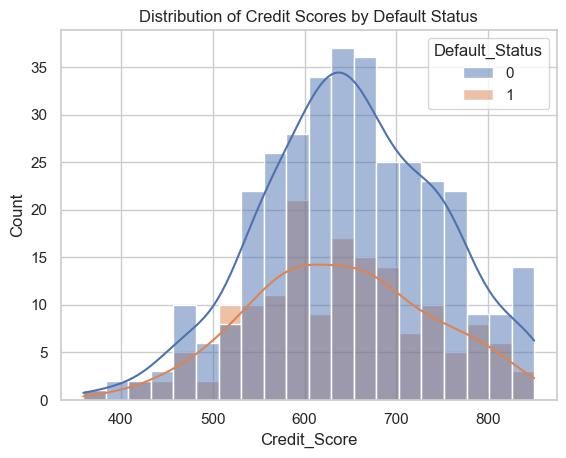

In [19]:
# Distribution of credit scores by default status

sns.histplot(data=loan_data_df, x="Credit_Score", hue="Default_Status", bins=20, kde=True)
plt.title("Distribution of Credit Scores by Default Status")

- Loan defaults are more prevalent with lower credit scores up to around 600 where the curve begins to flattens at around. Very few defaults happen around 650 - 800.

- The credit score of 650 illustrate a tipping point below which the number of defaults increase and above which the number of defaults decline. 

- Therefore, there is a threshold which the default rates spike.

In [20]:
# Segmenting the customers into different credit score bands

credit_score_bands = [300, 500, 600, 700, 800, 850] 

credit_score_band_labels = ["Very Poor", "Poor", "Fair", "Good", "Excellent"] 

loan_data_df["Credit_Score_Band"] = pd.cut(loan_data_df["Credit_Score"], bins=credit_score_bands, labels=credit_score_band_labels) 

loan_data_df.head()



,Customer_ID,Age,Gender,Marital_Status,Employment_Status,Education_Level,Number_of_Dependents,Region,Account_Tenure_Years,Annual_Income,...,Credit_Score,Previous_Defaults,Existing_Loan_Count,Debt_to_Income_Ratio,Monthly_Installment,Late_Payments_Count,Default_Status,Age_Group,Income_Band,Credit_Score_Band
0,C001,58,Female,Single,Employed,Diploma,3,Nairobi,17,2910864,...,643,0,1,0.62,37581.27,0,0,55-64,2.8M-3.2M,Fair
1,C002,48,Male,Widowed,Unemployed,Secondary,2,Nairobi,10,4543699,...,594,0,2,0.31,59163.75,1,1,45-54,4.4M-4.8M,Poor
2,C003,34,Male,Single,Unemployed,Secondary,0,Eldoret,20,3910879,...,818,0,0,0.44,35647.21,1,0,25-34,3.6M-4M,Excellent
3,C004,62,Female,Divorced,Unemployed,Masters,1,Nairobi,11,3335609,...,834,1,1,0.41,38137.61,0,0,55-64,3.2M-3.6M,Excellent
4,C005,27,Male,Single,Self-Employed,PhD,3,Nairobi,4,1135783,...,526,0,1,0.67,21082.50,0,1,25-34,800k-1.2M,Poor


Text(0, 0.5, 'Default Rate (%)')

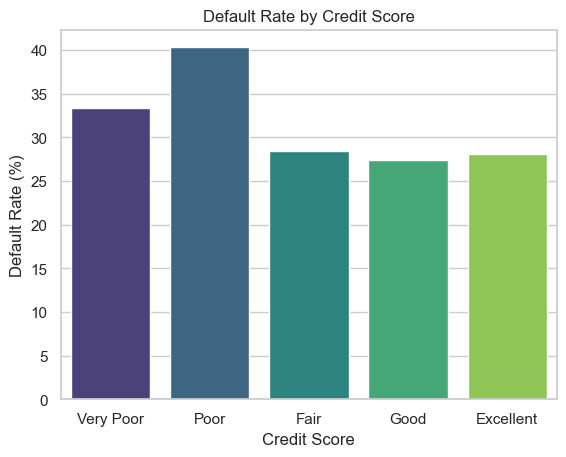

In [21]:
# Calculating default rate per credit score band 

default_rate_by_credit_score_band = loan_data_df.groupby("Credit_Score_Band").Default_Status.mean().reset_index() 

default_rate_by_credit_score_band.columns = ["Credit Score", "Default Rate"] 

default_rate_by_credit_score_band["Default Rate"] = default_rate_by_credit_score_band["Default Rate"] * 100

# Visualizing default rate by credit score band 

sns.barplot(data=default_rate_by_credit_score_band, x="Credit Score", y="Default Rate", palette="viridis")
plt.title("Default Rate by Credit Score")
plt.ylabel("Default Rate (%)") 


**Key Takeaway:** Borrowers with low credit score are significantly more likely to default on thier loans. 

- **Poor:** score has the highest default rate peaking at 40%. Borrowers with this score (500-600) are financial risky. 

- **Very Poor** follows closely with default rate of around 33%. This then reinforces the fact that low credit scores are associated with risky borrowing, hence, higher default rate. 

- Default rates significantly reduce from **Fare** to **Excellent**

#### **3. What is the relatinship between Debt-to-Income Ratio and loan default? - is there a critical DTI level that signals higher risks**

In [22]:
# Debt to Income Ratio (DTI) vs. Default Rate 
# DTI = Percentage of income that goes to debt payments 

loan_data_df.head()

,Customer_ID,Age,Gender,Marital_Status,Employment_Status,Education_Level,Number_of_Dependents,Region,Account_Tenure_Years,Annual_Income,...,Credit_Score,Previous_Defaults,Existing_Loan_Count,Debt_to_Income_Ratio,Monthly_Installment,Late_Payments_Count,Default_Status,Age_Group,Income_Band,Credit_Score_Band
0,C001,58,Female,Single,Employed,Diploma,3,Nairobi,17,2910864,...,643,0,1,0.62,37581.27,0,0,55-64,2.8M-3.2M,Fair
1,C002,48,Male,Widowed,Unemployed,Secondary,2,Nairobi,10,4543699,...,594,0,2,0.31,59163.75,1,1,45-54,4.4M-4.8M,Poor
2,C003,34,Male,Single,Unemployed,Secondary,0,Eldoret,20,3910879,...,818,0,0,0.44,35647.21,1,0,25-34,3.6M-4M,Excellent
3,C004,62,Female,Divorced,Unemployed,Masters,1,Nairobi,11,3335609,...,834,1,1,0.41,38137.61,0,0,55-64,3.2M-3.6M,Excellent
4,C005,27,Male,Single,Self-Employed,PhD,3,Nairobi,4,1135783,...,526,0,1,0.67,21082.50,0,1,25-34,800k-1.2M,Poor


In [23]:
# DTI as a Percentage 

loan_data_df["DTI_Percentage"] = loan_data_df.Debt_to_Income_Ratio * 100 

In [24]:
# DTI Bechmark as either Low Risk (Healthy), Moderate Risk, High Risk, Very High Risk 

DTI_Percentage_Bins = [0, 20, 35, 49, 100]

DTI_Labels = ["Low (Healthy)", "Moderate", "High", "Very High"]

loan_data_df["DTI_Percentage_Band"] = pd.cut(loan_data_df.DTI_Percentage, bins=DTI_Percentage_Bins, labels=DTI_Labels) 

Text(0.5, 1.0, 'Default Rate by Debt-to-Income Ratio')

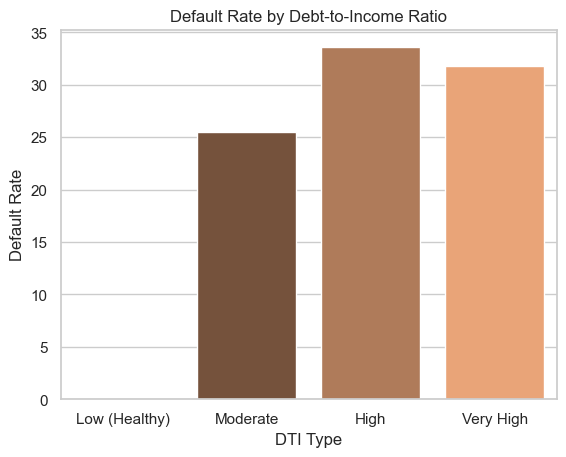

In [25]:
# Visualizing DTI Vs. Default Rate 

default_rate_by_DTI = loan_data_df.groupby("DTI_Percentage_Band").Default_Status.mean().reset_index()

default_rate_by_DTI["Default_Status"] = default_rate_by_DTI.Default_Status * 100 

default_rate_by_DTI.columns = ["DTI Type", "Default Rate"]

sns.barplot(data=default_rate_by_DTI, x="DTI Type", y="Default Rate", palette="copper") 
plt.title("Default Rate by Debt-to-Income Ratio")

**Key Takeaway:** 

Default rates increase with increase in Debt-to-Income ratio. Therefore, DTI is a strong indicator of the borrowers ability to manage and repay monthly debt obligations. 

The analysis reveals a strong relationship between increasing DTI levels and higher default rates. This underscores the importance of DTI during credit assessment.

**Observation** 

- There are significantly lower default rates for Low (Healthy) and Moderate DTI rates compared to High and Very High DTI rates.

- Higher default rates are triggered by High (36-49) and very high (>50), that is, they tend to spike at these DTI's

#### **4. Do existing loans or previous defaults significantly increase the risk of new defaults?**

In [26]:
loan_data_df.head()

,Customer_ID,Age,Gender,Marital_Status,Employment_Status,Education_Level,Number_of_Dependents,Region,Account_Tenure_Years,Annual_Income,...,Existing_Loan_Count,Debt_to_Income_Ratio,Monthly_Installment,Late_Payments_Count,Default_Status,Age_Group,Income_Band,Credit_Score_Band,DTI_Percentage,DTI_Percentage_Band
0,C001,58,Female,Single,Employed,Diploma,3,Nairobi,17,2910864,...,1,0.62,37581.27,0,0,55-64,2.8M-3.2M,Fair,62.0,Very High
1,C002,48,Male,Widowed,Unemployed,Secondary,2,Nairobi,10,4543699,...,2,0.31,59163.75,1,1,45-54,4.4M-4.8M,Poor,31.0,Moderate
2,C003,34,Male,Single,Unemployed,Secondary,0,Eldoret,20,3910879,...,0,0.44,35647.21,1,0,25-34,3.6M-4M,Excellent,44.0,High
3,C004,62,Female,Divorced,Unemployed,Masters,1,Nairobi,11,3335609,...,1,0.41,38137.61,0,0,55-64,3.2M-3.6M,Excellent,41.0,High
4,C005,27,Male,Single,Self-Employed,PhD,3,Nairobi,4,1135783,...,1,0.67,21082.50,0,1,25-34,800k-1.2M,Poor,67.0,Very High


In [27]:
loan_data_df.Existing_Loan_Count.min(), loan_data_df.Existing_Loan_Count.max()

(np.int64(0), np.int64(3))

Text(0.5, 1.0, 'Default Rate by Previous Default Count')

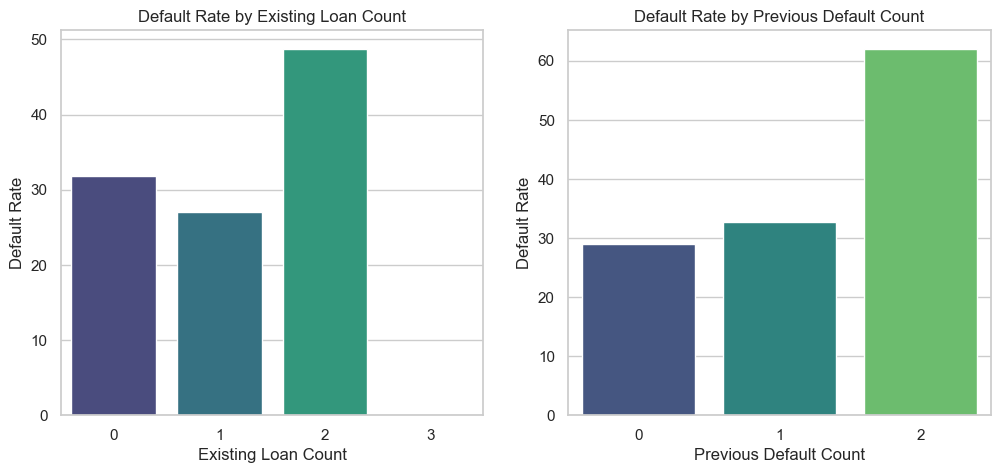

In [28]:
# Let's see if the existing number of loans and previous defaults has any effect on the default rate 


# Existing Loan Count
default_rate_by_existing_loan_count = loan_data_df.groupby("Existing_Loan_Count").Default_Status.mean().reset_index() 

default_rate_by_existing_loan_count.columns = ["Existing Loan Count", "Default Rate"] 

default_rate_by_existing_loan_count["Default Rate"] = default_rate_by_existing_loan_count["Default Rate"] * 100  


# Previous Default Count 
default_rate_by_previous_default_count = loan_data_df.groupby("Previous_Defaults").Default_Status.mean().reset_index()

default_rate_by_previous_default_count.columns = ["Previous Default Count", "Default Rate"] 

default_rate_by_previous_default_count["Default Rate"] = default_rate_by_previous_default_count["Default Rate"] * 100


# Visualizing the default rate by existing loaan count and previous default count 

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=default_rate_by_existing_loan_count, x="Existing Loan Count", y="Default Rate", palette="viridis", ax=ax[0])
ax[0].set_title("Default Rate by Existing Loan Count")

sns.barplot(data=default_rate_by_previous_default_count, x="Previous Default Count", y="Default Rate", palette="viridis", ax=ax[1]) 
ax[1].set_title("Default Rate by Previous Default Count")



**Key Takeaway:** 

Borrowers with multiple active loans and multiple histories of default are significantly more likely to default. These factors should therefore be integrated in credit risk assessment.

**Observations** 

  1. **Existing Loans Count** - Borrowers with no existing loans have a default rate of around 30% while those with one active loan have a default rate of ~27%. The rate significanly increases to ~48% for borrowers with two active loans. While taking an additional loan may not increase the risk of default significantly, having multiple loans stretches the financial capacity to repay. A count of two or more loans tends to be a critical threshold where the risk of default spikes. 

  2. **Previous Default Count** - Borrowers with zero default history have a default rate of ~28% while those with one previous default count have a rate of ~32%. For borrowers with two or more prior default counts, default rate spikes to ~62% suggesting that multiple instances of prior loan default should be treated as high-risk. 


    
    

#### **5. Which loan purposes are most commonly associated with loan defaults?**

In [29]:
loan_data_df.head()

,Customer_ID,Age,Gender,Marital_Status,Employment_Status,Education_Level,Number_of_Dependents,Region,Account_Tenure_Years,Annual_Income,...,Existing_Loan_Count,Debt_to_Income_Ratio,Monthly_Installment,Late_Payments_Count,Default_Status,Age_Group,Income_Band,Credit_Score_Band,DTI_Percentage,DTI_Percentage_Band
0,C001,58,Female,Single,Employed,Diploma,3,Nairobi,17,2910864,...,1,0.62,37581.27,0,0,55-64,2.8M-3.2M,Fair,62.0,Very High
1,C002,48,Male,Widowed,Unemployed,Secondary,2,Nairobi,10,4543699,...,2,0.31,59163.75,1,1,45-54,4.4M-4.8M,Poor,31.0,Moderate
2,C003,34,Male,Single,Unemployed,Secondary,0,Eldoret,20,3910879,...,0,0.44,35647.21,1,0,25-34,3.6M-4M,Excellent,44.0,High
3,C004,62,Female,Divorced,Unemployed,Masters,1,Nairobi,11,3335609,...,1,0.41,38137.61,0,0,55-64,3.2M-3.6M,Excellent,41.0,High
4,C005,27,Male,Single,Self-Employed,PhD,3,Nairobi,4,1135783,...,1,0.67,21082.50,0,1,25-34,800k-1.2M,Poor,67.0,Very High


In [34]:
# Checking the unique values in the Loan Purpose column

loan_data_df.Loan_Purpose.unique()

array(['Business', 'Medical', 'Education', 'Mortgage', 'Personal'],
      dtype=object)

In [36]:
# Get default rate by loan purpose

default_rate_by_loan_purpose = loan_data_df.groupby("Loan_Purpose").Default_Status.mean().reset_index() 

# Updating the column names 
default_rate_by_loan_purpose.columns = ["Loan Purpose", "Default Rate"] 

# Updating the default rate to percentage
default_rate_by_loan_purpose["Default Rate"] = default_rate_by_loan_purpose["Default Rate"] * 100

default_rate_by_loan_purpose 


,Loan Purpose,Default Rate
0,Business,31.481481
1,Education,31.868132
2,Medical,28.421053
3,Mortgage,38.750000
4,Personal,29.365079


Text(0.5, 1.0, 'Default Rate by Loan Purpose')

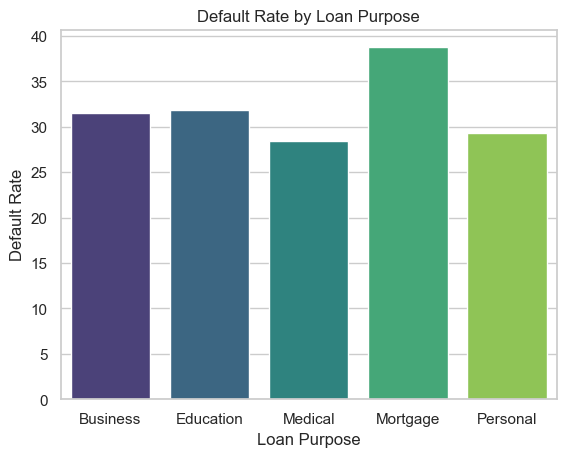

In [39]:
# Visualizing default rate by loan purpose 

sns.barplot(default_rate_by_loan_purpose, x="Loan Purpose", y="Default Rate", palette="viridis") 

plt.title("Default Rate by Loan Purpose")

**Key Takeaway** - While Mortgage purpose tend to be associated with high default rate (~38%), all loan purpose tend to cluster between 28% and 38%. This spread is fairly narrow. Loan purpose, therefore, is not a strong indicator of default risk and should be used in conjunction with other factors such as Debt-to-Income Ratio, Prior Default Counts, Number of Active Loans, etc., to obtain a more accurate risk assessment.

##

#### **6. Can we build a predictinve model to identify high-risk loan applicants before disbursements? - Using key variables like Credit Score, Income, and Loan Amount?**

**YES** - Based on the analysis, we can build a predictive model to identify high-risk loan applicants before disbursements. Important risk indicators include;

 - `Credit Score` - Negative relationship is clear. Low scores == higher credit risk

 - `Debt-to-Income Ratio` - Higher DTI suggests a likelihood of loan default.

 - `Previous Defaults` - Default rates is significantly higher for customers with prior defaults.

 - `Existing Loan Count` - Higher existing loan counts correlates with higher default rates

 - `Income` 

 - `Loan Amount` 

 - Optional == `Loan Purpose, Age, Tenure, etc.` (Have minimal predictive power) 

Target Variable == `Default_Status` (Defaulted = 0, Not Defaulted = 1)

